In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

In [2]:
df_ped = pd.read_csv('/Users/sabas/Downloads/AI Studio Fall 2024 (Pfizer)/Weekly_Cumulative_Influenza_Vaccination_Coverage__Children_6_months_through_17_years__United_States_20240826.csv')

In [3]:
df_adult = pd.read_csv('/Users/sabas/Downloads/AI Studio Fall 2024 (Pfizer)/Weekly_Cumulative_Influenza_Vaccination_Coverage__Adults_18_and_Older__United_States_20240826.csv')

In [4]:
df_ped.columns.sort_values()
df_adult.columns.sort_values()

Index(['95 CI (%)', 'CI_Half_width_95pct', 'Current_Season_Week_Ending',
       'Demographic_Level', 'Demographic_Level_Sort', 'Demographic_Name',
       'Demographic_Name_Sort', 'Geographic_Level', 'Geographic_Name',
       'Geographic_Sort', 'Indicator_Category_Label',
       'Indicator_Category_Label_Sort', 'Indicator_Label', 'Influenza_Season',
       'Legend', 'Legend_Sort', 'Month_Week', 'ND_Weekly_Estimate',
       'Season_Sort', 'Suppression_Flag', 'Week_Ending', 'n_unweighted'],
      dtype='object')

In [5]:
df_ped.rename(columns={
        'CI_HalfWidth': 'CI_Half_width_95pct',
        'Current_Season_Week_Ending_Label': 'Current_Season_Week_Ending',
        'Demographic_Level_Sort_Order': 'Demographic_Level_Sort',
        'Demographic_Name_Sort_Order': 'Demographic_Name_Sort',
        'Geography_Level': 'Geographic_Level',
        'Geography_Name': 'Geographic_Name',
        'geography_level_sort_order': 'Geographic_Sort',
        'Indicator Category Label': 'Indicator_Category_Label',
        'Legend_Label': 'Legend',
        'Point_Estimate': 'ND_Weekly_Estimate'
        }, inplace=True)
        
df = pd.concat([df_adult,df_ped],ignore_index=True)

In [6]:
df.head()

,Geographic_Level,Geographic_Name,Demographic_Level,Demographic_Name,Indicator_Label,Indicator_Category_Label,Month_Week,Week_Ending,ND_Weekly_Estimate,CI_Half_width_95pct,...,Legend,95 CI (%),Indicator_Category_Label_Sort,Demographic_Level_Sort,Demographic_Name_Sort,Geographic_Sort,Season_Sort,Legend_Sort,n_weighted,geography_name_order
0,State,Arizona,Overall,18+ years,4-level vaccination and intent,Definitely or probably will not get a vaccine,January Week 4,NaN,30.8,7.8784,...,"2023-2024, Arizona, Overall (18+ years)",22.9 - 38.7,4.0,1,1,14,3,3140101,NaN,NaN
1,State,Arizona,Overall,18+ years,4-level vaccination and intent,Definitely will get a vaccine,January Week 4,NaN,6.8,4.1669,...,"2023-2024, Arizona, Overall (18+ years)",2.6 - 11.0,2.0,1,1,14,3,3140101,NaN,NaN
2,State,Arizona,Overall,18+ years,4-level vaccination and intent,Probably will get a vaccine or are unsure,January Week 4,NaN,22.3,7.6134,...,"2023-2024, Arizona, Overall (18+ years)",14.7 - 29.9,3.0,1,1,14,3,3140101,NaN,NaN
3,State,Arizona,Overall,18+ years,4-level vaccination and intent,Received a vaccination,January Week 4,NaN,40.1,1.8745,...,"2023-2024, Arizona, Overall (18+ years)",38.2 - 41.9,1.0,1,1,14,3,3140101,NaN,NaN
4,State,Arizona,Overall,18+ years,Up-to-date,Yes,January Week 4,NaN,40.1,1.8745,...,"2023-2024, Arizona, Overall (18+ years)",38.2 - 41.9,NaN,1,1,14,3,3140101,NaN,NaN


In [7]:
df.describe()

,ND_Weekly_Estimate,CI_Half_width_95pct,n_unweighted,Suppression_Flag,Indicator_Category_Label_Sort,Demographic_Level_Sort,Demographic_Name_Sort,Geographic_Sort,Season_Sort,Legend_Sort,n_weighted,geography_name_order
count,21508.000000,21508.000000,21781.000000,21787.000000,13279.000000,21795.000000,21795.000000,21795.000000,21795.000000,2.179500e+04,4.262000e+03,4262.000000
mean,24.381323,3.944203,20764.399293,0.012852,2.360494,3.257674,7.276669,20.151594,2.484607,2.738392e+06,7.218916e+06,29.062881
std,18.071029,3.230457,58628.106300,0.112637,1.150496,3.902541,10.944091,23.454169,0.850740,8.736971e+05,1.203024e+07,24.312491
min,0.000000,0.000000,10.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.010101e+06,1.205700e+04,1.000000
25%,6.200000,1.793500,559.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.011332e+06,6.941355e+05,2.000000
50%,24.500000,3.055150,2777.000000,0.000000,2.000000,1.000000,1.000000,4.000000,3.000000,3.011332e+06,1.931946e+06,27.000000
75%,39.800000,5.013050,10186.000000,0.000000,3.000000,4.000000,11.000000,39.000000,3.000000,3.350101e+06,8.654925e+06,50.000000
max,78.400000,51.219300,437204.000000,1.000000,4.000000,14.000000,39.000000,74.000000,3.000000,3.740101e+06,7.060927e+07,74.000000


In [8]:
df.columns

Index(['Geographic_Level', 'Geographic_Name', 'Demographic_Level',
       'Demographic_Name', 'Indicator_Label', 'Indicator_Category_Label',
       'Month_Week', 'Week_Ending', 'ND_Weekly_Estimate',
       'CI_Half_width_95pct', 'n_unweighted', 'Suppression_Flag',
       'Current_Season_Week_Ending', 'Influenza_Season', 'Legend', '95 CI (%)',
       'Indicator_Category_Label_Sort', 'Demographic_Level_Sort',
       'Demographic_Name_Sort', 'Geographic_Sort', 'Season_Sort',
       'Legend_Sort', 'n_weighted', 'geography_name_order'],
      dtype='object')

In [9]:
df['Indicator_Category_Label_Sort'].unique()

array([ 4.,  2.,  3.,  1., nan])

In [10]:
df.head(10)

,Geographic_Level,Geographic_Name,Demographic_Level,Demographic_Name,Indicator_Label,Indicator_Category_Label,Month_Week,Week_Ending,ND_Weekly_Estimate,CI_Half_width_95pct,...,Legend,95 CI (%),Indicator_Category_Label_Sort,Demographic_Level_Sort,Demographic_Name_Sort,Geographic_Sort,Season_Sort,Legend_Sort,n_weighted,geography_name_order
0,State,Arizona,Overall,18+ years,4-level vaccination and intent,Definitely or probably will not get a vaccine,January Week 4,NaN,30.8,7.8784,...,"2023-2024, Arizona, Overall (18+ years)",22.9 - 38.7,4.0,1,1,14,3,3140101,NaN,NaN
1,State,Arizona,Overall,18+ years,4-level vaccination and intent,Definitely will get a vaccine,January Week 4,NaN,6.8,4.1669,...,"2023-2024, Arizona, Overall (18+ years)",2.6 - 11.0,2.0,1,1,14,3,3140101,NaN,NaN
2,State,Arizona,Overall,18+ years,4-level vaccination and intent,Probably will get a vaccine or are unsure,January Week 4,NaN,22.3,7.6134,...,"2023-2024, Arizona, Overall (18+ years)",14.7 - 29.9,3.0,1,1,14,3,3140101,NaN,NaN
3,State,Arizona,Overall,18+ years,4-level vaccination and intent,Received a vaccination,January Week 4,NaN,40.1,1.8745,...,"2023-2024, Arizona, Overall (18+ years)",38.2 - 41.9,1.0,1,1,14,3,3140101,NaN,NaN
4,State,Arizona,Overall,18+ years,Up-to-date,Yes,January Week 4,NaN,40.1,1.8745,...,"2023-2024, Arizona, Overall (18+ years)",38.2 - 41.9,NaN,1,1,14,3,3140101,NaN,NaN
5,State,Arkansas,Overall,18+ years,4-level vaccination and intent,Definitely or probably will not get a vaccine,January Week 4,NaN,43.2,10.8311,...,"2023-2024, Arkansas, Overall (18+ years)",32.3 - 54.0,4.0,1,1,15,3,3150101,NaN,NaN
6,State,Arkansas,Overall,18+ years,4-level vaccination and intent,Definitely will get a vaccine,January Week 4,NaN,2.8,2.1086,...,"2023-2024, Arkansas, Overall (18+ years)",0.7 - 4.9,2.0,1,1,15,3,3150101,NaN,NaN
7,State,Arkansas,Overall,18+ years,4-level vaccination and intent,Probably will get a vaccine or are unsure,January Week 4,NaN,12.7,6.5999,...,"2023-2024, Arkansas, Overall (18+ years)",6.1 - 19.3,3.0,1,1,15,3,3150101,NaN,NaN
8,State,Arkansas,Overall,18+ years,4-level vaccination and intent,Received a vaccination,January Week 4,NaN,41.3,2.0799,...,"2023-2024, Arkansas, Overall (18+ years)",39.2 - 43.4,1.0,1,1,15,3,3150101,NaN,NaN
9,State,Arkansas,Overall,18+ years,Up-to-date,Yes,January Week 4,NaN,41.3,2.0799,...,"2023-2024, Arkansas, Overall (18+ years)",39.2 - 43.4,NaN,1,1,15,3,3150101,NaN,NaN


In [11]:
for column in df.columns:
    print("\n")
    print(str(column) + ": " + str(df[column].unique()))



Geographic_Level: ['State' 'Substate' 'National' 'Region']


Geographic_Name: ['Arizona' 'Arkansas' 'California' 'Colorado' 'Connecticut' 'Delaware'
 'District of Columbia' 'Florida' 'Georgia' 'Hawaii' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Puerto Rico' 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee'
 'Texas' 'Utah' 'Vermont' 'Virginia' 'Washington' 'West Virginia'
 'Wisconsin' 'Wyoming' 'Illinois-City of Chicago' 'Illinois-Rest of State'
 'New York-New York City' 'New York-Rest of State'
 'Pennsylvania-Philadelphia County' 'Pennsylvania-Rest of State'
 'Texas-Bexar County' 'Texas-City of Houston' 'Texas-Rest of State'
 'National' 'Region 1' 'Region 10' 'Region 2' 'Region 3' 'Region 4'
 'Region 5' 'Regi

In [12]:
df.columns

Index(['Geographic_Level', 'Geographic_Name', 'Demographic_Level',
       'Demographic_Name', 'Indicator_Label', 'Indicator_Category_Label',
       'Month_Week', 'Week_Ending', 'ND_Weekly_Estimate',
       'CI_Half_width_95pct', 'n_unweighted', 'Suppression_Flag',
       'Current_Season_Week_Ending', 'Influenza_Season', 'Legend', '95 CI (%)',
       'Indicator_Category_Label_Sort', 'Demographic_Level_Sort',
       'Demographic_Name_Sort', 'Geographic_Sort', 'Season_Sort',
       'Legend_Sort', 'n_weighted', 'geography_name_order'],
      dtype='object')

In [13]:
print(df['Indicator_Label'].unique())

['4-level vaccination and intent' 'Up-to-date']


In [14]:
print(df['Indicator_Category_Label'].unique())

['Definitely or probably will not get a vaccine'
 'Definitely will get a vaccine'
 'Probably will get a vaccine or are unsure' 'Received a vaccination'
 'Yes']


In [15]:
print(df['Indicator_Category_Label_Sort'].unique())

[ 4.  2.  3.  1. nan]


In [16]:
print("NaN Indicator Catgeory Label_Sort: " + str(21794 - df['Indicator_Category_Label_Sort'].count()))

NaN Indicator Catgeory Label_Sort: 8515


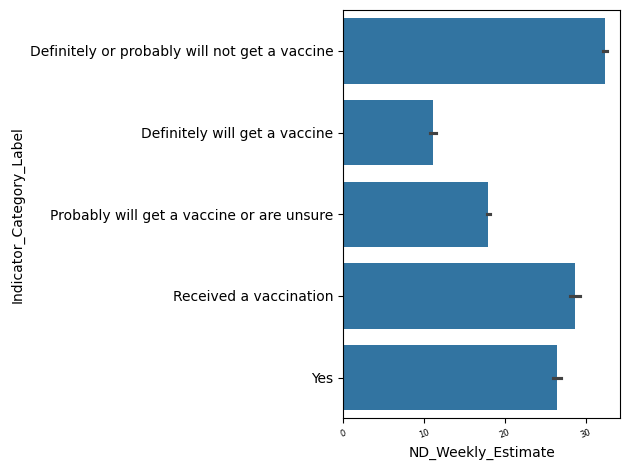

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
sns.barplot(data=df, x='ND_Weekly_Estimate', y='Indicator_Category_Label', ax=ax)
plt.xticks(fontsize=6,rotation=20)
plt.tight_layout()
plt.show()

In [18]:
'''
df_indicator_label = pd.get_dummies(df['Indicator_Category_Label'], prefix='Indicator_Category_Label_')
df = df.join(df_indicator_label)
numeric_df = df.select_dtypes(include=['float64','int64','bool'])
corr_matrix = numeric_df.corr()
corrs_1 = corr_matrix['ND_Weekly_Estimate']
corrs_sorted_1 = corrs_1.sort_values(ascending=False)
print(corrs_sorted_1) 
'''

"\ndf_indicator_label = pd.get_dummies(df['Indicator_Category_Label'], prefix='Indicator_Category_Label_')\ndf = df.join(df_indicator_label)\nnumeric_df = df.select_dtypes(include=['float64','int64','bool'])\ncorr_matrix = numeric_df.corr()\ncorrs_1 = corr_matrix['ND_Weekly_Estimate']\ncorrs_sorted_1 = corrs_1.sort_values(ascending=False)\nprint(corrs_sorted_1) \n"

In [19]:
df['Demographic_Name'].unique()

array(['18+ years', '18-29 years', '18-49 years', '30-39 years',
       '40-49 years', '50-64 years', '60+ years', '65+ years',
       '65-74 years', '75+ years', 'No', 'Yes', 'Cisgender', 'Uninsured',
       'Above Poverty, Income < $75k', 'Above Poverty, Income >= $75k',
       'Below Poverty', 'Poverty Status Unknown',
       'American Indian/Alaska Native, Non-Hispanic',
       'Asian, Non-Hispanic', 'Black, Non-Hispanic', 'Hispanic',
       'Multiple or Other Races, Non-Hispanic', 'Other, Non-Hispanic',
       'Pacific Islander/Native Hawaiian, Non-Hispanic',
       'White, Non-Hispanic', 'Female', 'Male', "Don't Know/Refused",
       'Gay/Lesbian/Bisexual/Other', 'Straight', 'Rural (Non-MSA)',
       'Suburban (MSA Non-Principal City)', 'Urban (MSA Principal City)',
       'Transgender/Nonbinary', 'Insured', '6 months-4 years',
       '6-23 months', '>= College degree', 'High school or equivalent',
       'Less than high school', 'Overall', '12-17 years', '13-17 years',
       '5

In [20]:
df['Current_Season_Week_Ending'].unique()

array(['01/27/2024 12:00:00 AM', '02/03/2024 12:00:00 AM',
       '01/06/2024 12:00:00 AM', '01/13/2024 12:00:00 AM',
       '01/20/2024 12:00:00 AM', '11/18/2023 12:00:00 AM',
       '11/25/2023 12:00:00 AM', '12/02/2023 12:00:00 AM',
       '10/07/2023 12:00:00 AM', '10/14/2023 12:00:00 AM',
       '10/21/2023 12:00:00 AM', '10/28/2023 12:00:00 AM',
       '11/04/2023 12:00:00 AM', '11/11/2023 12:00:00 AM',
       '09/30/2023 12:00:00 AM', '12/16/2023 12:00:00 AM',
       '02/10/2024 12:00:00 AM', '12/09/2023 12:00:00 AM',
       '03/16/2024 12:00:00 AM', '04/13/2024 12:00:00 AM',
       '12/23/2023 12:00:00 AM', '12/30/2023 12:00:00 AM',
       '05/11/2024 12:00:00 AM', '06/15/2024 12:00:00 AM',
       '03/02/2024 12:00:00 AM', '02/17/2024 12:00:00 AM',
       '03/09/2024 12:00:00 AM', '02/24/2024 12:00:00 AM',
       '03/31/2024 12:00:00 AM', '05/04/2024 12:00:00 AM',
       '03/23/2024 12:00:00 AM', '04/20/2024 12:00:00 AM',
       '04/06/2024 12:00:00 AM', '04/27/2024 12:00:00 AM

In [21]:
df.shape

(21795, 24)

In [22]:
nan_count = np.sum(df.isnull(), axis = 0)
print(nan_count)

Geographic_Level                     0
Geographic_Name                      0
Demographic_Level                    0
Demographic_Name                     0
Indicator_Label                      0
Indicator_Category_Label             0
Month_Week                           0
Week_Ending                      17533
ND_Weekly_Estimate                 287
CI_Half_width_95pct                287
n_unweighted                        14
Suppression_Flag                     8
Current_Season_Week_Ending           0
Influenza_Season                     0
Legend                               0
95 CI (%)                           93
Indicator_Category_Label_Sort     8516
Demographic_Level_Sort               0
Demographic_Name_Sort                0
Geographic_Sort                      0
Season_Sort                          0
Legend_Sort                          0
n_weighted                       17533
geography_name_order             17533
dtype: int64


In [23]:
df.shape

(21795, 24)

In [24]:
df.dropna(subset=['95 CI (%)'], inplace=True)

In [25]:
print(np.sum(df['95 CI (%)'].isnull(), axis=0))

0


In [26]:
df.shape

(21702, 24)

In [27]:
n_mean = df['n_unweighted'].mean()
df['n_unweighted'].fillna(value=n_mean, inplace=True)

C:\Users\sabas\AppData\Local\Temp\ipykernel_20724\2153505924.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['n_unweighted'].fillna(value=n_mean, inplace=True)


In [28]:
print(np.sum(df['n_unweighted'].isnull(), axis=0))

0


In [29]:
nd_mean = df['ND_Weekly_Estimate'].mean()
df['ND_Weekly_Estimate'].fillna(value=nd_mean, inplace=True)
print(np.sum(df['ND_Weekly_Estimate'].isnull(), axis=0))

0


C:\Users\sabas\AppData\Local\Temp\ipykernel_20724\2882510942.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ND_Weekly_Estimate'].fillna(value=nd_mean, inplace=True)


In [30]:
suppression_mean = df['Suppression_Flag'].mean()
df['Suppression_Flag'].fillna(value=suppression_mean, inplace=True)
print(np.sum(df['Suppression_Flag'].isnull(), axis=0))

0


C:\Users\sabas\AppData\Local\Temp\ipykernel_20724\1402633656.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Suppression_Flag'].fillna(value=suppression_mean, inplace=True)


In [31]:
ci_half_width_mean = df['CI_Half_width_95pct'].mean()
df['CI_Half_width_95pct'].fillna(value=ci_half_width_mean, inplace=True)
print(np.sum(df['CI_Half_width_95pct'].isnull(), axis=0))

0


C:\Users\sabas\AppData\Local\Temp\ipykernel_20724\3775633255.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CI_Half_width_95pct'].fillna(value=ci_half_width_mean, inplace=True)


In [32]:
df['Indicator_Category_Label_Sort'].fillna(value=0, inplace=True)
print(np.sum(df['Indicator_Category_Label_Sort'].isnull(), axis=0))

0


C:\Users\sabas\AppData\Local\Temp\ipykernel_20724\1300723985.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Indicator_Category_Label_Sort'].fillna(value=0, inplace=True)


In [33]:
nan_count = np.sum(df.isnull(), axis = 0)
print(nan_count)

Geographic_Level                     0
Geographic_Name                      0
Demographic_Level                    0
Demographic_Name                     0
Indicator_Label                      0
Indicator_Category_Label             0
Month_Week                           0
Week_Ending                      17440
ND_Weekly_Estimate                   0
CI_Half_width_95pct                  0
n_unweighted                         0
Suppression_Flag                     0
Current_Season_Week_Ending           0
Influenza_Season                     0
Legend                               0
95 CI (%)                            0
Indicator_Category_Label_Sort        0
Demographic_Level_Sort               0
Demographic_Name_Sort                0
Geographic_Sort                      0
Season_Sort                          0
Legend_Sort                          0
n_weighted                       17440
geography_name_order             17440
dtype: int64


In [34]:
df.head()

,Geographic_Level,Geographic_Name,Demographic_Level,Demographic_Name,Indicator_Label,Indicator_Category_Label,Month_Week,Week_Ending,ND_Weekly_Estimate,CI_Half_width_95pct,...,Legend,95 CI (%),Indicator_Category_Label_Sort,Demographic_Level_Sort,Demographic_Name_Sort,Geographic_Sort,Season_Sort,Legend_Sort,n_weighted,geography_name_order
0,State,Arizona,Overall,18+ years,4-level vaccination and intent,Definitely or probably will not get a vaccine,January Week 4,NaN,30.8,7.8784,...,"2023-2024, Arizona, Overall (18+ years)",22.9 - 38.7,4.0,1,1,14,3,3140101,NaN,NaN
1,State,Arizona,Overall,18+ years,4-level vaccination and intent,Definitely will get a vaccine,January Week 4,NaN,6.8,4.1669,...,"2023-2024, Arizona, Overall (18+ years)",2.6 - 11.0,2.0,1,1,14,3,3140101,NaN,NaN
2,State,Arizona,Overall,18+ years,4-level vaccination and intent,Probably will get a vaccine or are unsure,January Week 4,NaN,22.3,7.6134,...,"2023-2024, Arizona, Overall (18+ years)",14.7 - 29.9,3.0,1,1,14,3,3140101,NaN,NaN
3,State,Arizona,Overall,18+ years,4-level vaccination and intent,Received a vaccination,January Week 4,NaN,40.1,1.8745,...,"2023-2024, Arizona, Overall (18+ years)",38.2 - 41.9,1.0,1,1,14,3,3140101,NaN,NaN
4,State,Arizona,Overall,18+ years,Up-to-date,Yes,January Week 4,NaN,40.1,1.8745,...,"2023-2024, Arizona, Overall (18+ years)",38.2 - 41.9,0.0,1,1,14,3,3140101,NaN,NaN


In [35]:
df = df.drop(columns=['Week_Ending','n_weighted','geography_name_order'])

In [36]:
nan_count = np.sum(df.isnull(), axis = 0)
print(nan_count)

Geographic_Level                 0
Geographic_Name                  0
Demographic_Level                0
Demographic_Name                 0
Indicator_Label                  0
Indicator_Category_Label         0
Month_Week                       0
ND_Weekly_Estimate               0
CI_Half_width_95pct              0
n_unweighted                     0
Suppression_Flag                 0
Current_Season_Week_Ending       0
Influenza_Season                 0
Legend                           0
95 CI (%)                        0
Indicator_Category_Label_Sort    0
Demographic_Level_Sort           0
Demographic_Name_Sort            0
Geographic_Sort                  0
Season_Sort                      0
Legend_Sort                      0
dtype: int64


In [37]:
df['Age_Group'] = df['Demographic_Name'].where(df['Demographic_Name'].str.contains('years'))
df.columns

Index(['Geographic_Level', 'Geographic_Name', 'Demographic_Level',
       'Demographic_Name', 'Indicator_Label', 'Indicator_Category_Label',
       'Month_Week', 'ND_Weekly_Estimate', 'CI_Half_width_95pct',
       'n_unweighted', 'Suppression_Flag', 'Current_Season_Week_Ending',
       'Influenza_Season', 'Legend', '95 CI (%)',
       'Indicator_Category_Label_Sort', 'Demographic_Level_Sort',
       'Demographic_Name_Sort', 'Geographic_Sort', 'Season_Sort',
       'Legend_Sort', 'Age_Group'],
      dtype='object')

In [38]:
df['Age_Group'].unique()

array(['18+ years', '18-29 years', '18-49 years', '30-39 years',
       '40-49 years', '50-64 years', '60+ years', '65+ years',
       '65-74 years', '75+ years', nan, '6 months-4 years', '12-17 years',
       '13-17 years', '5-11 years', '5-12 years', '5-17 years'],
      dtype=object)

In [39]:
nan_count = np.sum(df.isnull(), axis = 0)
print(nan_count)

Geographic_Level                    0
Geographic_Name                     0
Demographic_Level                   0
Demographic_Name                    0
Indicator_Label                     0
Indicator_Category_Label            0
Month_Week                          0
ND_Weekly_Estimate                  0
CI_Half_width_95pct                 0
n_unweighted                        0
Suppression_Flag                    0
Current_Season_Week_Ending          0
Influenza_Season                    0
Legend                              0
95 CI (%)                           0
Indicator_Category_Label_Sort       0
Demographic_Level_Sort              0
Demographic_Name_Sort               0
Geographic_Sort                     0
Season_Sort                         0
Legend_Sort                         0
Age_Group                        8529
dtype: int64


In [40]:
df['Age_Group'] = df['Age_Group'].fillna(0)
df['Age_Group'] = df['Age_Group'].replace({
    '6 months-4 years': 1,
    '5-11 years': 2,
    '5-12 years': 3,
    '5-17 years' : 4,
    '12-17 years' : 5,
    '13-17 years' : 6,
    '18+ years' : 7,
    '18-29 years' : 8,
    '18-49 years' : 9,
    '30-39 years' : 10,
    '40-49 years' : 11,
    '50-64 years' : 12,
    '60+ years' : 13,
    '65+ years' : 14,
    '65-74 years' : 15,
    '75+ years' : 16
})

C:\Users\sabas\AppData\Local\Temp\ipykernel_20724\1211279866.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Age_Group'] = df['Age_Group'].replace({


In [41]:
df['Month_Week'].unique()

array(['January Week 4', 'February Week 1', 'January Week 1',
       'January Week 2', 'January Week 3', 'November Week 3',
       'November Week 4', 'December Week 1', 'October Week 2',
       'October Week 3', 'October Week 4', 'October Week 5',
       'November Week 1', 'November Week 2', 'October Week 1', 'October',
       'November', 'December', 'February', 'December Week 2', 'March',
       'April', 'January', 'December Week 3', 'December Week 4',
       'December Week 5', 'May', 'June', 'March Week 1',
       'February Week 2', 'February Week 3', 'March Week 2',
       'March Week 3', 'February Week 4', 'March Week 5', 'May Week 1',
       'May Week 2', 'March Week 4', 'April Week 2', 'April Week 3',
       'April Week 1', 'April Week 4'], dtype=object)

In [42]:
df['Month'] = df['Month_Week'].str.extract(r'([A-Za-z]+)')[0]
df['Month'] = df['Month'].str.strip()
df['Month'].unique()

array(['January', 'February', 'November', 'December', 'October', 'March',
       'April', 'May', 'June'], dtype=object)

In [43]:
df['Month'] = df['Month'].replace({
    'January' : 1,
    'February' : 2,
    'November' : 11,
    'December' : 12,
    'October' : 10,
    'March' : 3,
    'April' : 4,
    'May' : 5,
    'June' : 6
})

C:\Users\sabas\AppData\Local\Temp\ipykernel_20724\683800597.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Month'] = df['Month'].replace({


In [44]:
df['Geographic_Name'].unique()

array(['Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
       'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii',
       'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming',
       'Illinois-City of Chicago', 'Illinois-Rest of State',
       'New York-New York City', 'New York-Rest of State',
       'Pennsylvania-Philadelphia County', 'Pennsylvania-Rest of State',
       'Texas-Bexar County', 'Texas-City of Houston',
       'Texas-Rest of State', 'National', '

In [45]:
df['Demographic_Level'].value_counts()

Demographic_Level
Overall                               14585
Age                                    1905
Race/Ethnicity                         1418
Poverty Status                          816
Urbanicity                              612
Sexual Orientation                      477
Gender Identity                         473
Disability Status                       318
Sex                                     318
Health Insurance                        318
Health Insurance Among 18-64 Years      282
Mother's Education                      180
Name: count, dtype: int64

In [46]:
df['Geographic_Level'].value_counts()

Geographic_Level
State       10667
National     7321
Region       2040
Substate     1674
Name: count, dtype: int64

In [47]:
df['Age_Group'].value_counts()

Age_Group
7     11313
0      8529
12      318
14      159
16      159
8       159
15      159
13      159
11      159
10      159
9       159
1        45
5        45
6        45
2        45
3        45
4        45
Name: count, dtype: int64

In [48]:
df['Demographic_Name'].value_counts()

Demographic_Name
18+ years                                         11313
Overall                                            3272
50-64 years                                         318
Don't Know/Refused                                  314
Uninsured                                           300
Insured                                             300
Hispanic                                            204
Above Poverty, Income < $75k                        204
White, Non-Hispanic                                 204
Black, Non-Hispanic                                 204
Poverty Status Unknown                              204
Below Poverty                                       204
Above Poverty, Income >= $75k                       204
Rural (Non-MSA)                                     204
Suburban (MSA Non-Principal City)                   204
Urban (MSA Principal City)                          204
Other, Non-Hispanic                                 186
Gay/Lesbian/Bisexual/Other     

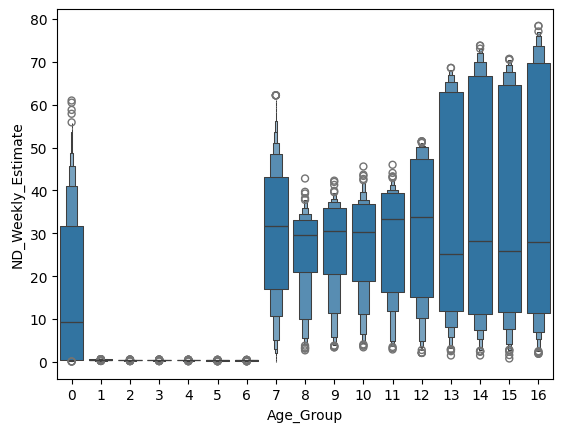

In [49]:
sns.boxenplot(data=df, x='Age_Group', y='ND_Weekly_Estimate')
plt.show()

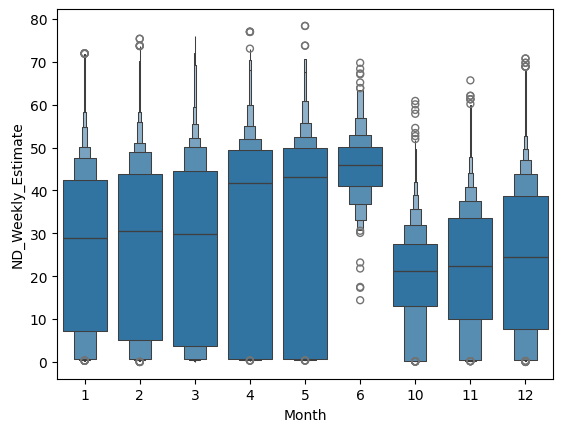

In [50]:
sns.boxenplot(data=df, x='Month', y='ND_Weekly_Estimate')
plt.show()